In [1]:
!pip install qiskit

In [16]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_ibm_runtime import QiskitRuntimeService

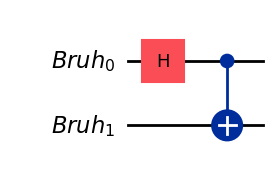

In [41]:
qregs = QuantumRegister(2, "Bruh")
qc = QuantumCircuit(qregs)

qc.h(0)
qc.cx(0, 1)

# qc.measure_all()

qc.draw("mpl")

In [42]:
from qiskit.quantum_info import Statevector

Statevector(qc).draw("latex")

<IPython.core.display.Latex object>

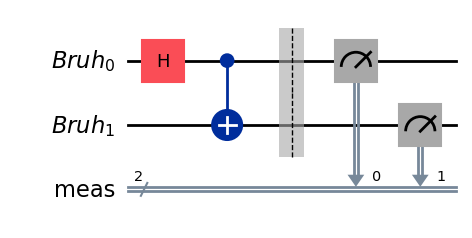

In [43]:
qc.measure_all()
qc.draw("mpl")

In [17]:
from qiskit import generate_preset_pass_manager

service = QiskitRuntimeService()
backend = service.backend("ibm_rensselaer")

pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

In [18]:
isa_circ = pm.run(qc)

In [20]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode=backend)

In [23]:
job = sampler.run([isa_circ])

In [24]:
job.job_id()

'cvmzrq282hx0008480qg'

In [25]:
job.result()

PrimitiveResult([PubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-09-17 22:02:08', stop='2024-09-17 22:02:22', size=4096>)])}, 'version': 2})

In [26]:
job.result()[0]

PubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})

In [37]:
measurement = job.result()[0].data.meas.get_counts()

measurement

{'11': 1965, '00': 2059, '01': 40, '10': 32}

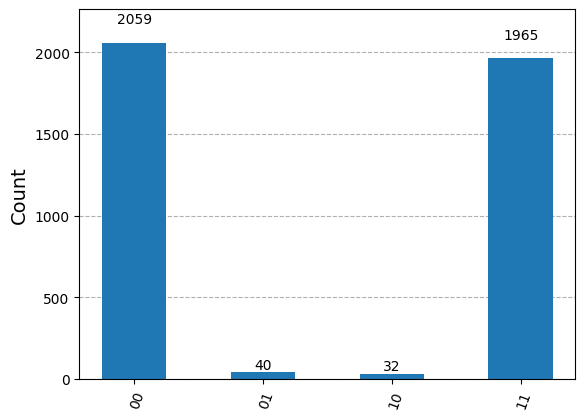

In [38]:
from qiskit.visualization import plot_histogram

plot_histogram(measurement)